## EDA Project

1. Load the dataset into pandas and provide a summary of columns in the loaded dataset without any modification.
2. Prepare the data frame for further analysis. Clean it, mold it in any manner you see fit.
3. Provide a summary of the cleaned dataset along with some preliminary analysis and contrast it with the uncleaned dataset wherever modifications are made.

4. Answer the following questions using the clean dataset by plotting suitable graphs:
  
  a. What is the distribution of sales among different cities in different months?
 
  b. Which city had the highest sales overall?

  c. Which Month had the highest amount of sales overall?

  d. Most bought products per city.

Based on your analysis, suggest a city for establishing a new branch for the retail store backed with proper reasoning.

5. Find out the distribution of sales over different times of the day (Morning, Afternoon, Evening, Night) and answer the following for each city;
  
  a. What products are mostly sold at different times of the day?
 
  b. Which time of day has the most sales?

Based on your analysis, suggest the best working hours and the best products for the retail stores in each city.

6. Find out the pair of products that are most sold together. For example, generally, we would expect a person who buys an iPhone 11 to also buy the Apple Airpods together with it. Identify such pairs of products and suggest what promotional offers should the retail company come up with based on your outcome.

## 1. Load the dataset into pandas and provide a summary of columns in the loaded dataset without any modification.

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading datasets

df = pd.read_csv('C:\\Users\\acer\\Downloads\\all_data_copy.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## SUMMARY

## This dataset is a informaion about online orders.

Order ID - Unique ID numbers for the orders

Product - Different products ordered

Quantity Ordered - Numbers of quantity ordered 

Price each - Price of one unit 

Order Date - Date of ordering

Purchase Address - Address of the buyers with street name, City name and Postal code

## 2. Prepare the data frame for further analysis. Clean it, mold it in any manner you see fit.

In [3]:
# Information of null values
df.isnull().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

In [4]:
#Can drop NA values as dropping those null values doesn't make any changes
df = df.dropna()

In [5]:
#Checking data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372610 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 19.9+ MB


As there are unwanted data in between the rows, need to remove all those unwanted data

In [6]:
#As we could see columns names have repeated again and again as rows
#filtering one single column, we get all the data of rows
value_list = ["Order ID"]
boolean_series = df['Order ID'].isin(value_list)
filtered = df[boolean_series]
filtered

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
372014,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
372401,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373413,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373482,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
#setting order ID column as index to remove the data
data_with_index = df.set_index("Order ID")
data_with_index.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [8]:
#Dropping all the unwanted data
data_with_index = data_with_index.drop("Order ID")

In [9]:
#this is the dataframe without any unwanted data
data_with_index

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...
259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"


In [10]:
#As we could see all the columns are object data type
#we need to convert into required datatypes


In [11]:
#Quantity Ordered had string data type, converted into integer
data_with_index['Quantity Ordered'] = data_with_index['Quantity Ordered'].astype(int)

In [12]:
#Price Each had to convert into float
#Order Date had to convert into Date and Time format

In [13]:
data_with_index['Price Each'] = data_with_index['Price Each'].astype(float)

In [14]:
data_with_index['Order Date'] = data_with_index['Order Date'].astype('datetime64')

In [15]:
#Sanity check
data_with_index.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371900 entries, 141234 to 259357
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Product           371900 non-null  object        
 1   Quantity Ordered  371900 non-null  int32         
 2   Price Each        371900 non-null  float64       
 3   Order Date        371900 non-null  datetime64[ns]
 4   Purchase Address  371900 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(2)
memory usage: 15.6+ MB


In [16]:
#Description about numeric values
data_with_index.describe()

,Quantity Ordered,Price Each
count,371900.000000,371900.000000
mean,1.124383,184.399735
std,0.442792,332.730883
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


In [17]:
#description about the Categorical data
data_with_index.describe(include = ['object'])

,Product,Purchase Address
count,371900,371900
unique,19,140787
top,USB-C Charging Cable,"193 Forest St, San Francisco, CA 94016"
freq,43806,18


In [18]:
#Sanity check
data_with_index

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...
259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"


In [19]:
#Need to split Purhased address into three columns of Street, City and Postal Code, as we might need while data analysis City wise
city_names = data_with_index["Purchase Address"].str.split(", ")
data = city_names.to_list()
names = ["Street","City","Postal Code"]
new_df = pd.DataFrame(data, columns=names)
new_df


,Street,City,Postal Code
0,944 Walnut St,Boston,MA 02215
1,185 Maple St,Portland,OR 97035
2,538 Adams St,San Francisco,CA 94016
3,738 10th St,Los Angeles,CA 90001
4,387 10th St,Austin,TX 73301
...,...,...,...
371895,840 Highland St,Los Angeles,CA 90001
371896,216 Dogwood St,San Francisco,CA 94016
371897,220 12th St,San Francisco,CA 94016
371898,511 Forest St,San Francisco,CA 94016


In [20]:
#Checking Categorical data with respect to city 
new_df.describe()

,Street,City,Postal Code
count,371900,371900,371900
unique,46837,9,10
top,753 Cedar St,San Francisco,CA 94016
freq,28,89464,89464


In [21]:
#Checking different cities in the data sets
new_df.City.unique()

array(['Boston', 'Portland', 'San Francisco', 'Los Angeles', 'Austin',
       'Atlanta', 'Seattle', 'New York City', 'Dallas'], dtype=object)

In [22]:
#Checking unique postal code
new_df['Postal Code'].unique()

array(['MA 02215', 'OR 97035', 'CA 94016', 'CA 90001', 'TX 73301',
       'GA 30301', 'WA 98101', 'NY 10001', 'TX 75001', 'ME 04101'],
      dtype=object)

In [23]:
# Earlier we had converted Order ID as Index, we will convert it back as value
df2= data_with_index.reset_index()
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
371895,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
371896,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
371897,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
371898,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [24]:
#Concating splitted data of address city and postal code with the original dataframe 
final_df = pd.concat([df2, new_df], axis=1)
final_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Street,City,Postal Code
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",185 Maple St,Portland,OR 97035
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",538 Adams St,San Francisco,CA 94016
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",738 10th St,Los Angeles,CA 90001
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",387 10th St,Austin,TX 73301
...,...,...,...,...,...,...,...,...,...
371895,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",840 Highland St,Los Angeles,CA 90001
371896,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",216 Dogwood St,San Francisco,CA 94016
371897,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",220 12th St,San Francisco,CA 94016
371898,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",511 Forest St,San Francisco,CA 94016


In [25]:
#As we already have address data in street, city and postal code columns, we can drop purchased address column
final_df.drop('Purchase Address', inplace=True, axis=1)
final_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Street,City,Postal Code
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,185 Maple St,Portland,OR 97035
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,538 Adams St,San Francisco,CA 94016
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,738 10th St,Los Angeles,CA 90001
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,387 10th St,Austin,TX 73301
...,...,...,...,...,...,...,...,...
371895,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,840 Highland St,Los Angeles,CA 90001
371896,259354,iPhone,1,700.00,2019-09-01 16:00:00,216 Dogwood St,San Francisco,CA 94016
371897,259355,iPhone,1,700.00,2019-09-23 07:39:00,220 12th St,San Francisco,CA 94016
371898,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,511 Forest St,San Francisco,CA 94016


In [26]:
#Have to check duplicate values
duplicate = final_df[final_df.duplicated(['Order ID', 'Order Date','Product'], keep = 'last')]
duplicate

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Street,City,Postal Code
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,185 Maple St,Portland,OR 97035
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,538 Adams St,San Francisco,CA 94016
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,738 10th St,Los Angeles,CA 90001
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,387 10th St,Austin,TX 73301
...,...,...,...,...,...,...,...,...
370002,257530,USB-C Charging Cable,1,11.95,2019-09-03 11:13:00,192 Johnson St,San Francisco,CA 94016
371227,258715,Lightning Charging Cable,1,14.95,2019-09-15 16:50:00,550 10th St,Portland,OR 97035
371562,259035,27in FHD Monitor,1,149.99,2019-09-29 13:52:00,327 Lake St,San Francisco,CA 94016
371832,259296,Apple Airpods Headphones,1,150.00,2019-09-28 16:48:00,894 6th St,Dallas,TX 75001


In [27]:
#As there 186261 rows of duplicate values, we drop them by matching with other columns too
final_df = final_df.drop_duplicates(subset=["Order ID", "Product","Order Date","Street"])

In [28]:
#We might need a column of total amount paid, so we shall create  a new column called Amount by multiplying quantities and price of each unit
final_df['Amount']= final_df['Quantity Ordered'] * final_df['Price Each']
final_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Street,City,Postal Code,Amount
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,944 Walnut St,Boston,MA 02215,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,185 Maple St,Portland,OR 97035,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,538 Adams St,San Francisco,CA 94016,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,738 10th St,Los Angeles,CA 90001,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,387 10th St,Austin,TX 73301,11.99
...,...,...,...,...,...,...,...,...,...
185945,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,14 Madison St,San Francisco,CA 94016,14.95
185946,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,549 Willow St,Los Angeles,CA 90001,7.68
185947,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,273 Wilson St,Seattle,WA 98101,400.00
185948,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,778 River St,Dallas,TX 75001,11.99


In [29]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185639 entries, 0 to 185949
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185639 non-null  object        
 1   Product           185639 non-null  object        
 2   Quantity Ordered  185639 non-null  int32         
 3   Price Each        185639 non-null  float64       
 4   Order Date        185639 non-null  datetime64[ns]
 5   Street            185639 non-null  object        
 6   City              185639 non-null  object        
 7   Postal Code       185639 non-null  object        
 8   Amount            185639 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), object(5)
memory usage: 13.5+ MB


## 3. Provide a summary of the cleaned dataset along with some preliminary analysis and contrast it with the uncleaned dataset wherever modifications are made.

1. As we could now see the cleaned and modified data
2. We dropped all null values, any how dropping them doesn't make any changes.
3. Changed Object data types to necessary required data types, like numericals and date-time format.
4. As we had a column of address, we split that column into three different columns a Street, City and Postal Code
5. We might need total amount of each order, so we added a new column called Amount by multiplying Quantity ordered and Price each.
6. We dropped duplicate values by comparing with four columns


## 4. Answer the following questions using the clean dataset by plotting suitable graphs:

a. What is the distribution of sales among different cities in different months?

b. Which city had the highest sales overall?

c. Which Month had the highest amount of sales overall?

d. Most bought products per city.

# 4b. Which city had the highest sales overall?

            City     Amount
0        Atlanta 2794180.28
1         Austin 1818002.91
2         Boston 3658576.41
3         Dallas 2765323.12
4    Los Angeles 5448276.11
5  New York City 4661785.60
6       Portland 2319277.24
7  San Francisco 8254633.38
8        Seattle 2745020.40


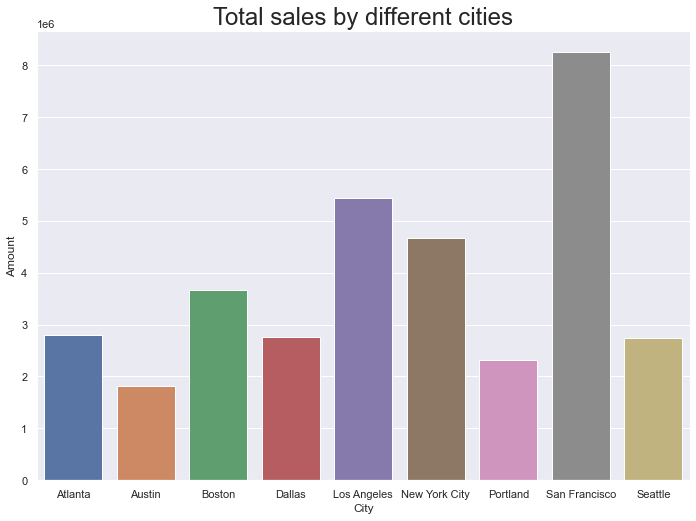

In [30]:
#Obtaining total sales by different cities, by groupby function
city_sales = final_df.groupby(('City')).agg({'Amount': 'sum'})

#As numerical numbers are high, total sales will be shown in exponential format, so we need to change the format of float and assign only 2 decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#Grouped data will be in array format, have to change in to coulmns
city_sales = city_sales.reset_index()
print(city_sales)

#ploting bar graph through seaborn

x= city_sales.Amount
y= city_sales.City

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(y,x).set_title('Total sales by different cities', fontsize = 24)

By seeing the graph we could see that San Francisco has highest sales


#  San Francisco can be chosen to expand and start a new branch in the city, as there is lot of orders compared to other cities. 

# Other than that,city Lake Oswego, having postal code OR 97035, can be chosen to start a new branch. Because orders for Lake Oswego delivers from Portland.

In [31]:
#As we need monthly and hourly data, we have to convert and add a new columns namely Hour and Month
final_df['Hour'] = (final_df['Order Date']).dt.hour
final_df['Month'] = (final_df['Order Date']).dt.month
final_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Street,City,Postal Code,Amount,Hour,Month
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,944 Walnut St,Boston,MA 02215,700.00,21,1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,185 Maple St,Portland,OR 97035,14.95,14,1
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,538 Adams St,San Francisco,CA 94016,23.98,13,1
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,738 10th St,Los Angeles,CA 90001,149.99,20,1
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,387 10th St,Austin,TX 73301,11.99,11,1
...,...,...,...,...,...,...,...,...,...,...,...
185945,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,14 Madison St,San Francisco,CA 94016,14.95,20,12
185946,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,549 Willow St,Los Angeles,CA 90001,7.68,12,12
185947,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,273 Wilson St,Seattle,WA 98101,400.00,6,12
185948,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,778 River St,Dallas,TX 75001,11.99,10,12


# 4c. Which Month had the highest amount of sales overall?

    Month     Amount
0       1 1821413.16
1       2 2200012.30
2       3 2804954.57
3       4 3389203.47
4       5 3150537.62
5       6 2576265.21
6       7 2646434.43
7       8 2241042.83
8       9 2094453.70
9      10 3734714.66
10     11 3197823.37
11     12 4608220.13


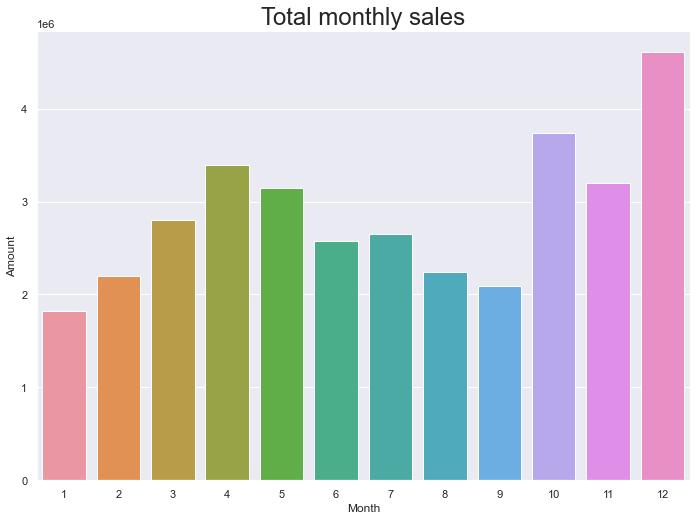

In [32]:
#Obtaining total sales by different months, by groupby function
monthly_sales = final_df.groupby(('Month')).agg({'Amount': 'sum'})

#Grouped data will be in array format, have to change in to coulmns
monthly_sales = monthly_sales.reset_index()
print(monthly_sales)

#ploting bar graph through seaborn

x= monthly_sales.Amount
y= monthly_sales.Month

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(y,x).set_title('Total monthly sales', fontsize = 24)

By observing above graph we can come to conclude that 12th month, i.e December has highest sale


# To Analyse 4a & 4d, we can filter data to individual cities

In [33]:
#To Scrutinise about different cities, we have to filter data individualy with respect to different cities

In [34]:
#To check different names of Cities
final_df.City.unique()

array(['Boston', 'Portland', 'San Francisco', 'Los Angeles', 'Austin',
       'Atlanta', 'Seattle', 'New York City', 'Dallas'], dtype=object)

In [35]:
#filtering Boston city
value_list = ["Boston"]
boolean_series = final_df['City'].isin(value_list)
boston = final_df[boolean_series]
#boston

# 4a. Boston monthly sales 

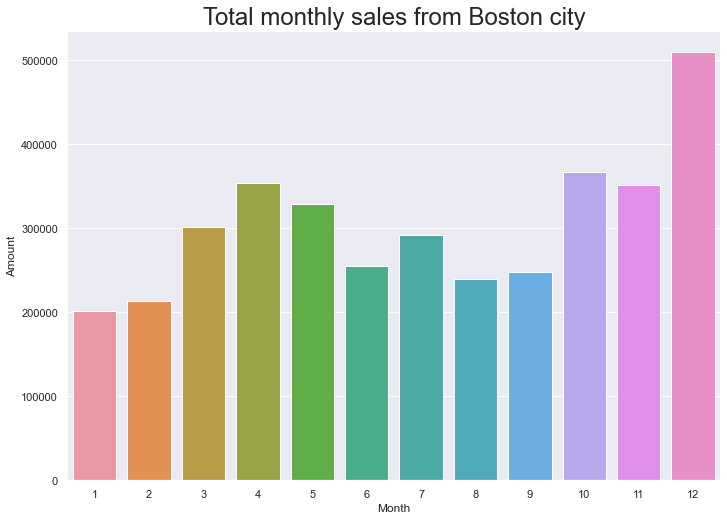

In [36]:

#Obtaining total sales by different months, by groupby function
boston_monthly = boston.groupby(('Month')).agg({'Amount': 'sum'})

#Grouped data will be in array format, have to change in to coulmns
boston_monthly = boston_monthly.reset_index()
#print(boston_monthly)

#ploting bar graph through seaborn

x= boston_monthly.Amount
y= boston_monthly.Month

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(y,x).set_title('Total monthly sales from Boston city', fontsize = 24)

By observing above graph we can come to conclude that 12th month, i.e December has highest sale from Boston city

# 4d. Products ordered from Boston city

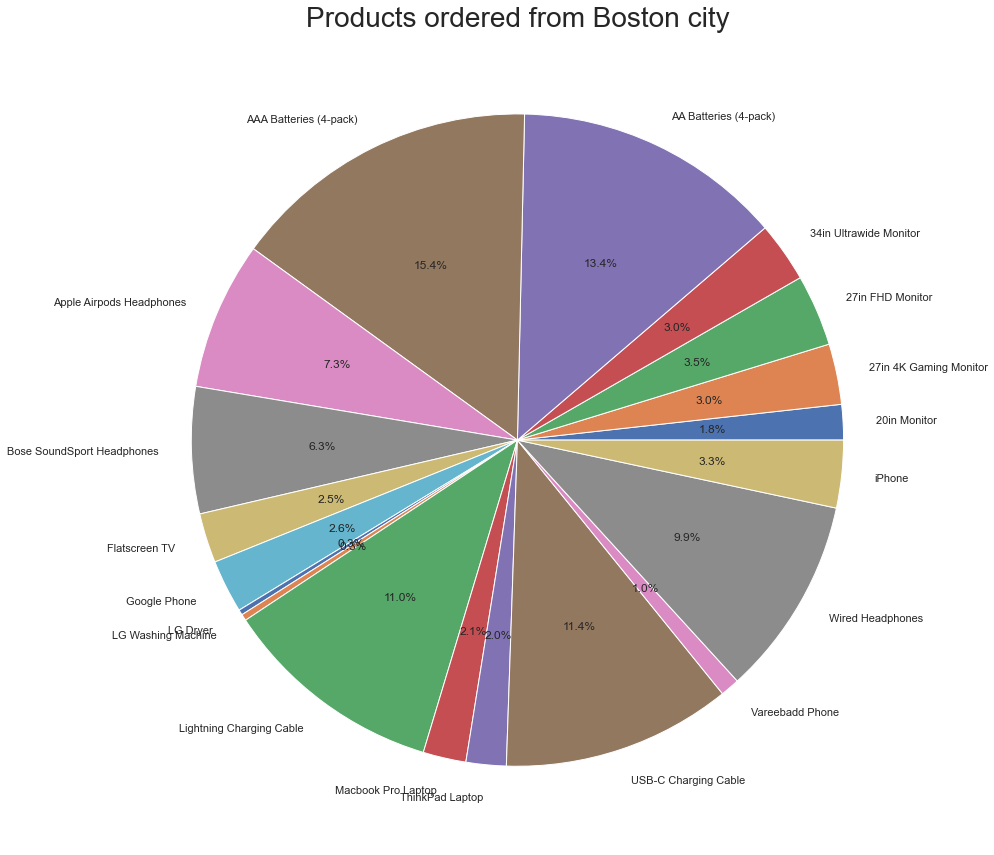

In [37]:
#To find the number products 
boston_product = boston.groupby(('Product')).agg({'Quantity Ordered': 'sum'})

#Grouped data will be in array format, have to change in to coulmns
boston_product = boston_product.reset_index()
#print(boston_product)

quantity= boston_product['Quantity Ordered']
products= boston_product.Product
#plotting pie chart to find highest products ordered in the city

plt.figure(figsize = (30,15)) 

plt.pie(quantity,labels = products, autopct='%1.1f%%')
plt.title('Products ordered from Boston city', fontsize=28)
plt.show()

We could see AAA Batteries (4-pack) has highest ordered in the Boston city

In [38]:
#Portland city data
value_list = ["Portland"]
boolean_series = final_df['City'].isin(value_list)
portland = final_df[boolean_series]
#portland

# 4a. Portland monthly sales 

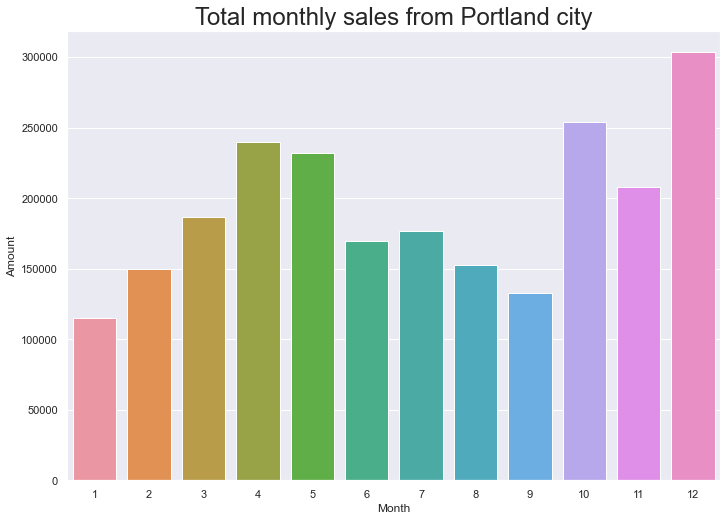

In [39]:
#Obtaining total sales by different months, by groupby function
portland_monthly = portland.groupby(('Month')).agg({'Amount': 'sum'})


#Grouped data will be in array format, have to change in to coulmns
portland_monthly = portland_monthly.reset_index()
#print(portland_monthly)

#ploting bar graph through seaborn

x= portland_monthly.Amount
y= portland_monthly.Month

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(y,x).set_title('Total monthly sales from Portland city', fontsize = 24)

As we could see 12th month has highest sale than other month. i.e December month

# 4d. Highest product ordered in Portland city

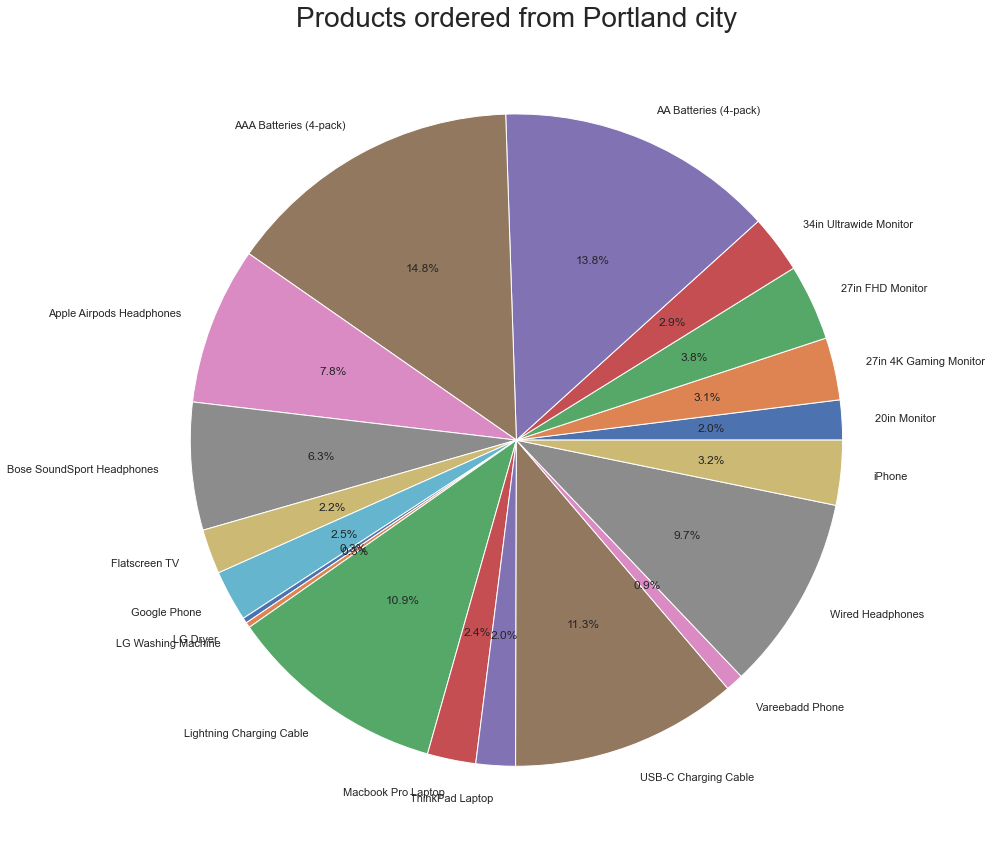

In [40]:
#To find the number products 
portland_product = portland.groupby(('Product')).agg({'Quantity Ordered': 'sum'})

#Grouped data will be in array format, have to change in to coulmns
portland_product = portland_product.reset_index()
#print(portland_product)

quantity= portland_product['Quantity Ordered']
products= portland_product.Product
#plotting pie chart to find highest products ordered in the city

plt.figure(figsize = (30,15)) 

plt.pie(quantity,labels = products, autopct='%1.1f%%')
plt.title('Products ordered from Portland city', fontsize=28)
plt.show()

We could see AAA Batteries (4-pack) has highest ordered in the Portland city

In [41]:
#San Francisco data
value_list = ["San Francisco"]
boolean_series = final_df['City'].isin(value_list)
sanfrance = final_df[boolean_series]
#sanfrance

# 4a. San Francisco monthly sales

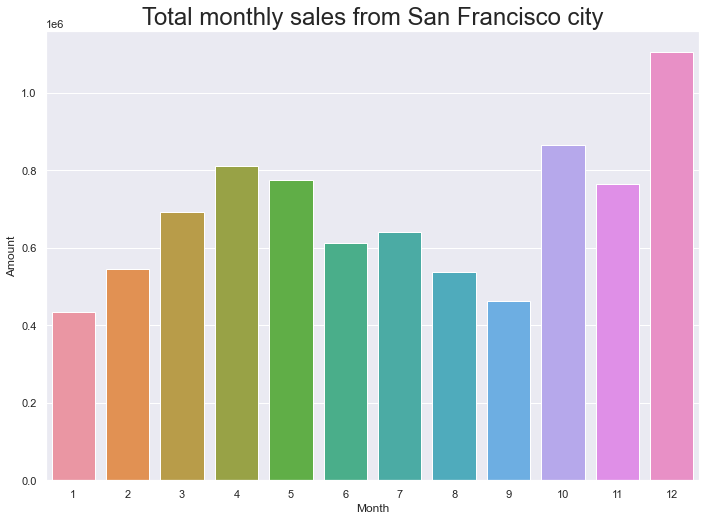

In [42]:
#Obtaining total sales by different months, by groupby function
sanfrance_monthly = sanfrance.groupby(('Month')).agg({'Amount': 'sum'})


#Grouped data will be in array format, have to change in to coulmns
sanfrance_monthly = sanfrance_monthly.reset_index()
#print(sanfrance_monthly)

#ploting bar graph through seaborn

x= sanfrance_monthly.Amount
y= sanfrance_monthly.Month

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(y,x).set_title('Total monthly sales from San Francisco city', fontsize = 24)

As we could see 12th month has highest sale for San Francisco city. i.e December month

# 4d. Highest product ordered in San Francisco city

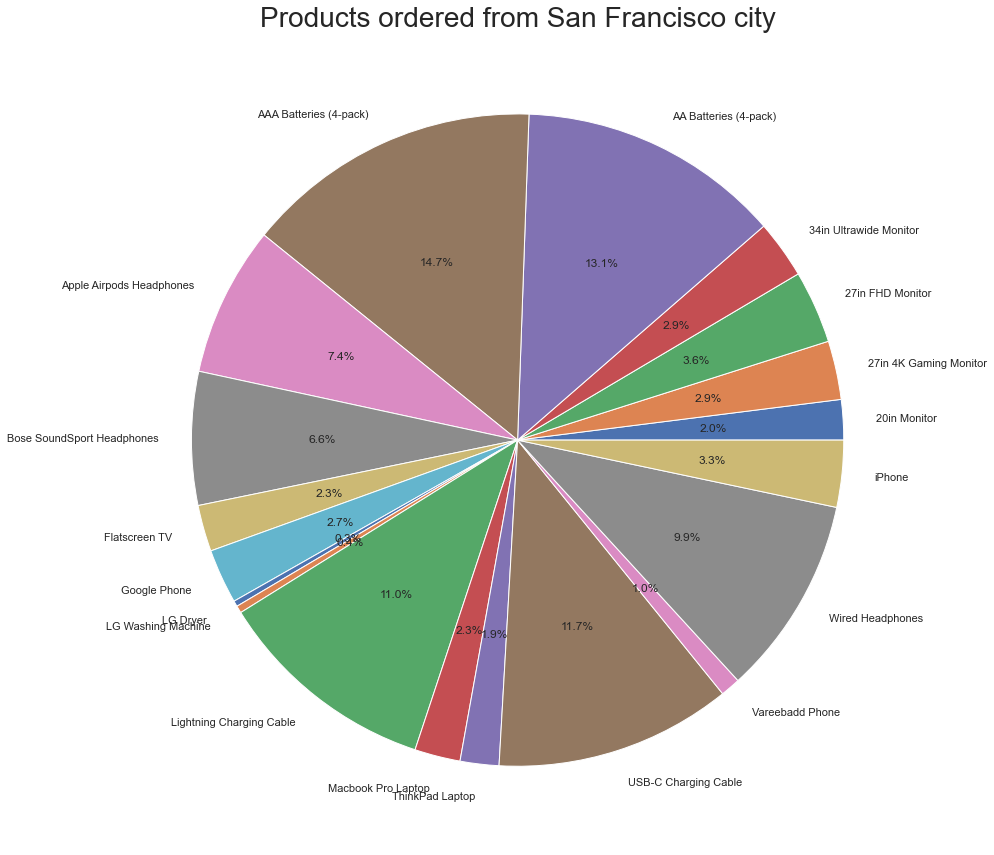

In [43]:
#To find the number products 
sanfrance_product = sanfrance.groupby(('Product')).agg({'Quantity Ordered': 'sum'})

#Grouped data will be in array format, have to change in to coulmns
sanfrance_product = sanfrance_product.reset_index()
#print(sanfrance_product)

quantity= sanfrance_product['Quantity Ordered']
products= sanfrance_product.Product
#plotting pie chart to find highest products ordered in the city

plt.figure(figsize = (30,15)) 

plt.pie(quantity,labels = products, autopct='%1.1f%%')
plt.title('Products ordered from San Francisco city', fontsize=28)
plt.show()

We could see AAA Batteries (4-pack) has highest ordered in the Portland city

In [44]:
#Los Angeles Data
value_list = ["Los Angeles"]
boolean_series = final_df['City'].isin(value_list)
la = final_df[boolean_series]
#la

# 4a. Los Angels monthly sales 

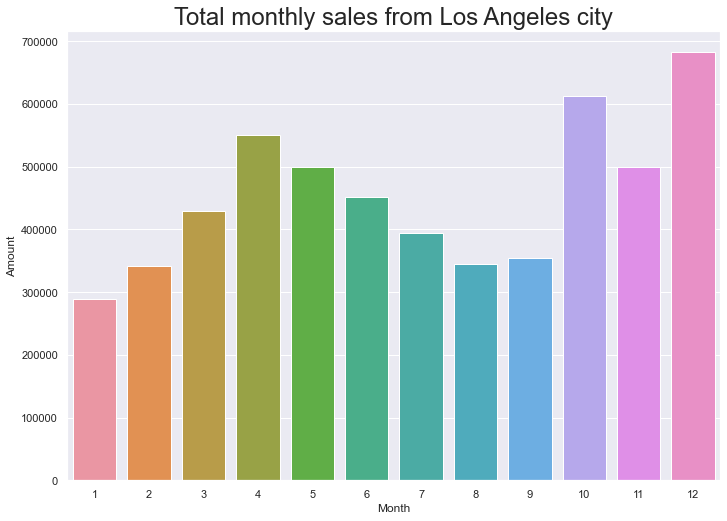

In [45]:
#Obtaining total sales by different months, by groupby function
la_monthly = la.groupby(('Month')).agg({'Amount': 'sum'})


#Grouped data will be in array format, have to change in to coulmns
la_monthly = la_monthly.reset_index()
#print(la_monthly)

#ploting bar graph through seaborn

x= la_monthly.Amount
y= la_monthly.Month

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(y,x).set_title('Total monthly sales from Los Angeles city', fontsize = 24)

As we could see 12th month has highest sale than other month. i.e December month

# 4d. Highest product ordered in Los Angeles city

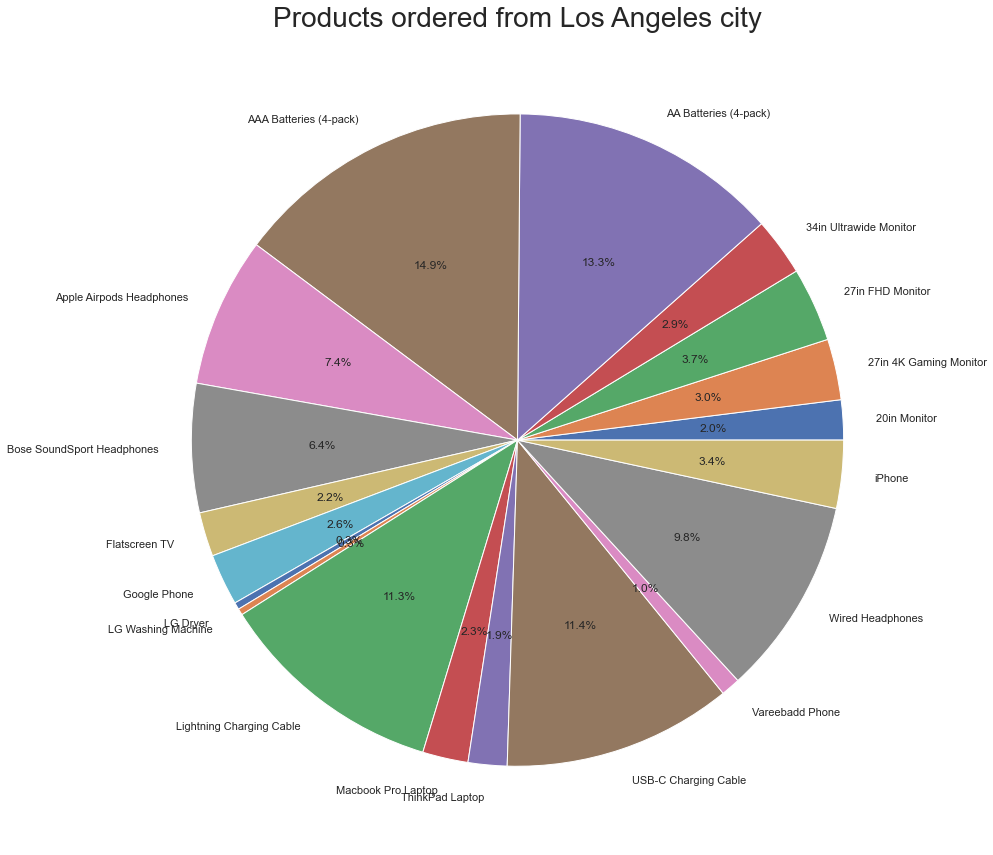

In [46]:
#To find the number products 
la_product = la.groupby(('Product')).agg({'Quantity Ordered': 'sum'})

#Grouped data will be in array format, have to change in to coulmns
la_product = la_product.reset_index()
#print(la_product)

quantity= la_product['Quantity Ordered']
products= la_product.Product
#plotting pie chart to find highest products ordered in the city

plt.figure(figsize = (30,15)) 

plt.pie(quantity,labels = products, autopct='%1.1f%%')
plt.title('Products ordered from Los Angeles city', fontsize=28)
plt.show()

We could see AAA Batteries (4-pack) has highest ordered in the Los Angeles city

In [47]:
value_list = ["Austin"]
boolean_series = final_df['City'].isin(value_list)
austin = final_df[boolean_series]
#austin

# 4a. Austin monthly sales

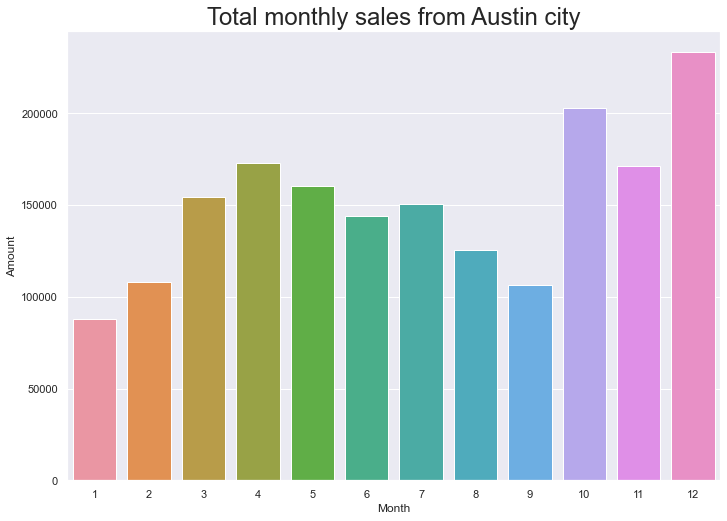

In [48]:
#Obtaining total sales by different months, by groupby function
austin_monthly = austin.groupby(('Month')).agg({'Amount': 'sum'})


#Grouped data will be in array format, have to change in to coulmns
austin_monthly = austin_monthly.reset_index()
#print(austin_monthly)

#ploting bar graph through seaborn

x= austin_monthly.Amount
y= austin_monthly.Month

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(y,x).set_title('Total monthly sales from Austin city', fontsize = 24)

As we could see 12th month has highest sale than other month. i.e December month

# 4d. Highest product at Austin city


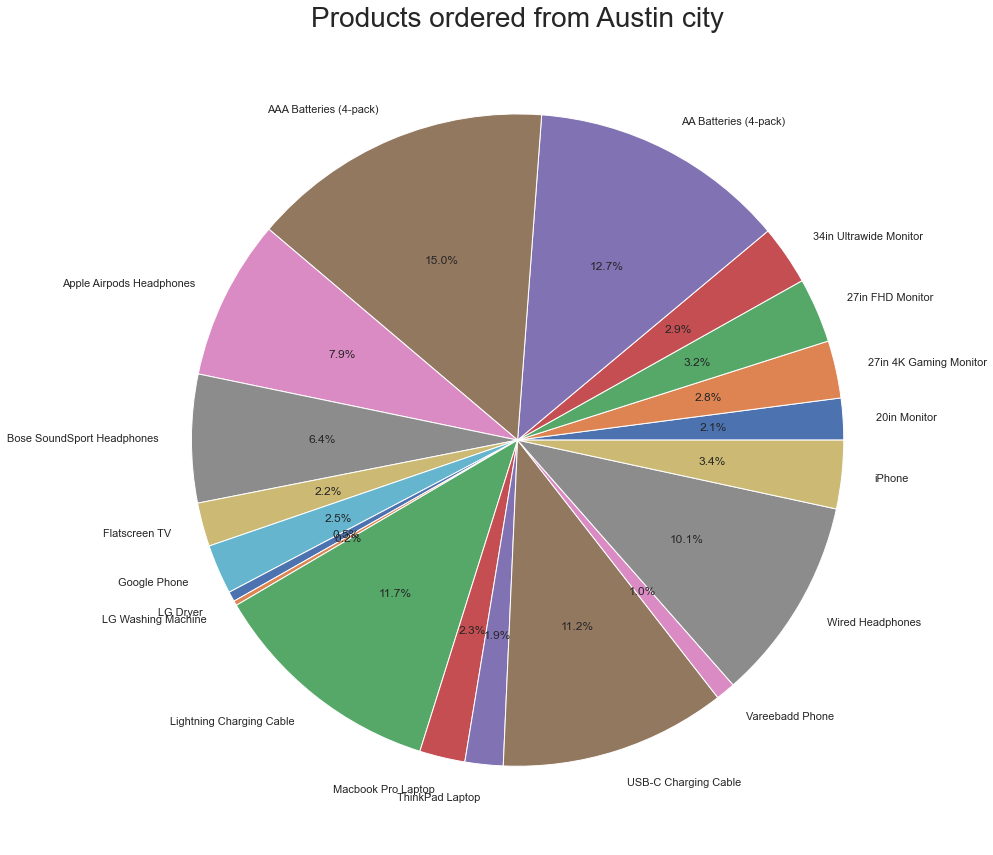

In [49]:
#To find the number products 
austin_product = austin.groupby(('Product')).agg({'Quantity Ordered': 'sum'})

#Grouped data will be in array format, have to change in to coulmns
austin_product = austin_product.reset_index()
#print(austin_product)

quantity= austin_product['Quantity Ordered']
products= austin_product.Product
#plotting pie chart to find highest products ordered in the city

plt.figure(figsize = (30,15)) 

plt.pie(quantity,labels = products, autopct='%1.1f%%')
plt.title('Products ordered from Austin city', fontsize=28)
plt.show()

We could see AAA Batteries (4-pack) has highest ordered in the Los Angeles city

In [50]:
#Atlanta Data
value_list = ["Atlanta"]
boolean_series = final_df['City'].isin(value_list)
atlanta = final_df[boolean_series]
#atlanta

# 4a. Atlanta monthly sales 

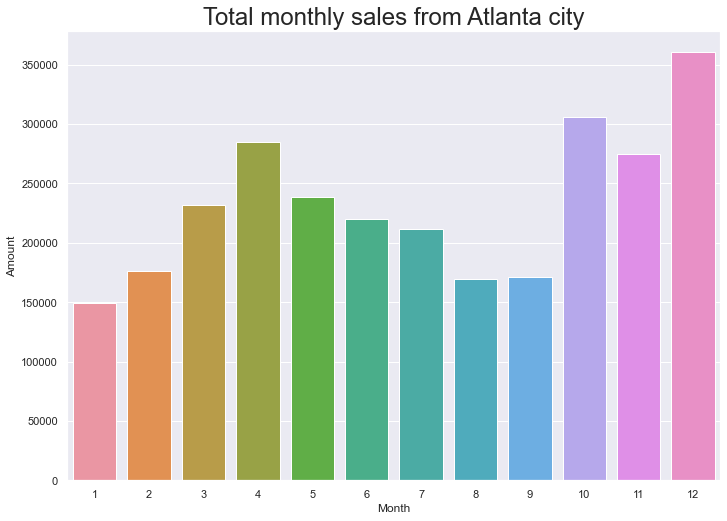

In [51]:
#Obtaining total sales by different months, by groupby function
atlanta_monthly = atlanta.groupby(('Month')).agg({'Amount': 'sum'})


#Grouped data will be in array format, have to change in to coulmns
atlanta_monthly = atlanta_monthly.reset_index()
#print(atlanta_monthly)

#ploting bar graph through seaborn

x= atlanta_monthly.Amount
y= atlanta_monthly.Month

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(y,x).set_title('Total monthly sales from Atlanta city', fontsize = 24)

As we could see 12th month has highest sale than other month. i.e December month

# 4d. Highest product ordered in Atlanta city

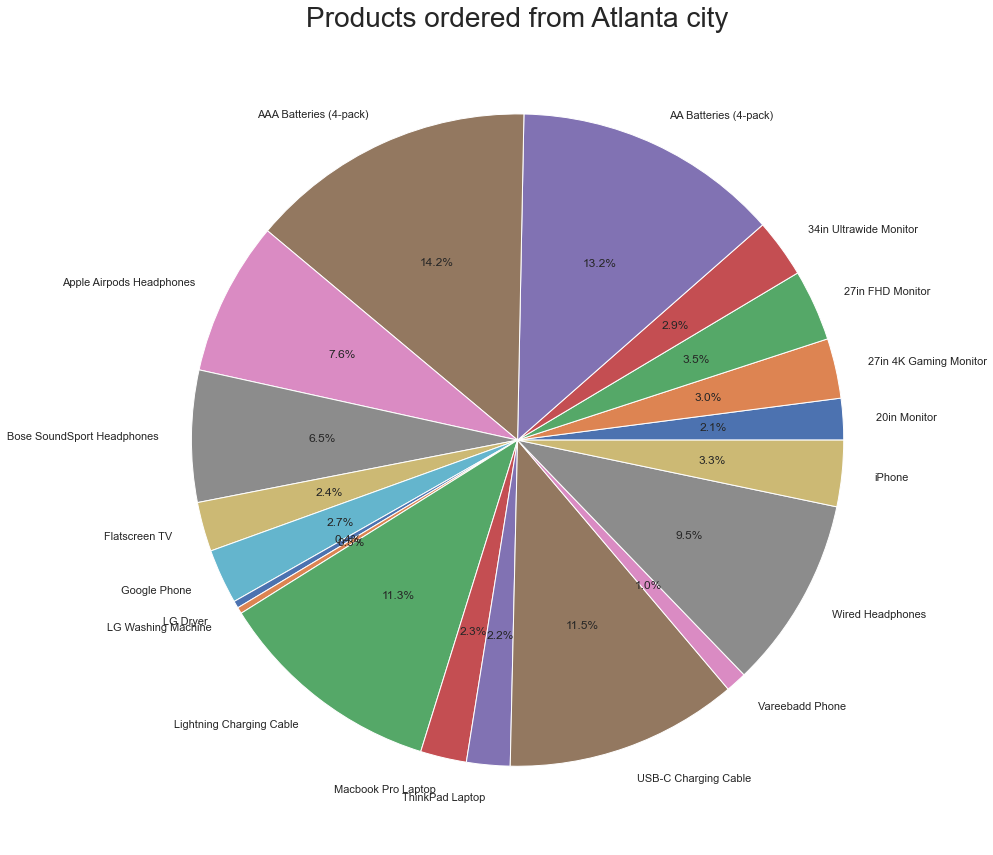

In [52]:
#To find the number products 
atlanta_product = atlanta.groupby(('Product')).agg({'Quantity Ordered': 'sum'})

#Grouped data will be in array format, have to change in to coulmns
atlanta_product = atlanta_product.reset_index()
#print(atlanta_product)

quantity= atlanta_product['Quantity Ordered']
products= atlanta_product.Product
#plotting pie chart to find highest products ordered in the city

plt.figure(figsize = (30,15)) 

plt.pie(quantity,labels = products, autopct='%1.1f%%')
plt.title('Products ordered from Atlanta city', fontsize=28)
plt.show()

We could see AAA Batteries (4-pack) has highest ordered in the Atlanta city

In [53]:
#Seattle Data
value_list = ["Seattle"]
boolean_series = final_df['City'].isin(value_list)
seattle = final_df[boolean_series]
#seattle

# 4a. Portland monthly sales 

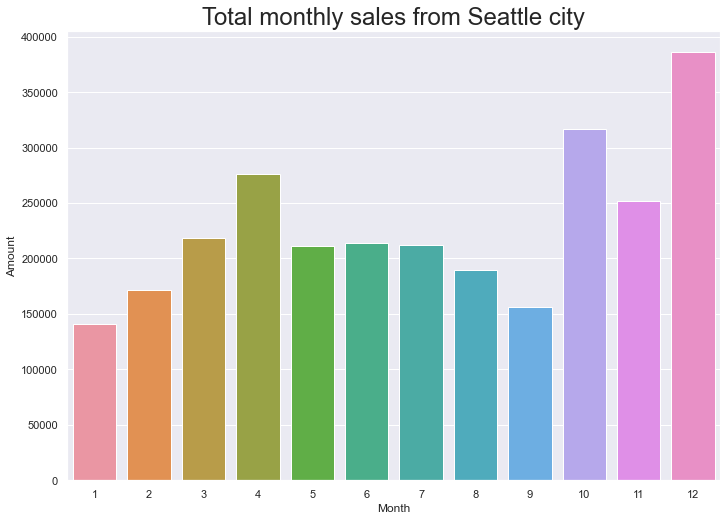

In [54]:
#Obtaining total sales by different months, by groupby function
seattle_monthly = seattle.groupby(('Month')).agg({'Amount': 'sum'})


#Grouped data will be in array format, have to change in to coulmns
seattle_monthly = seattle_monthly.reset_index()
#print(seattle_monthly)

#ploting bar graph through seaborn

x= seattle_monthly.Amount
y= seattle_monthly.Month

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(y,x).set_title('Total monthly sales from Seattle city', fontsize = 24)

As we could see 12th month has highest sale than other month. i.e December month

# 4d. Highest product ordered in Seattle city

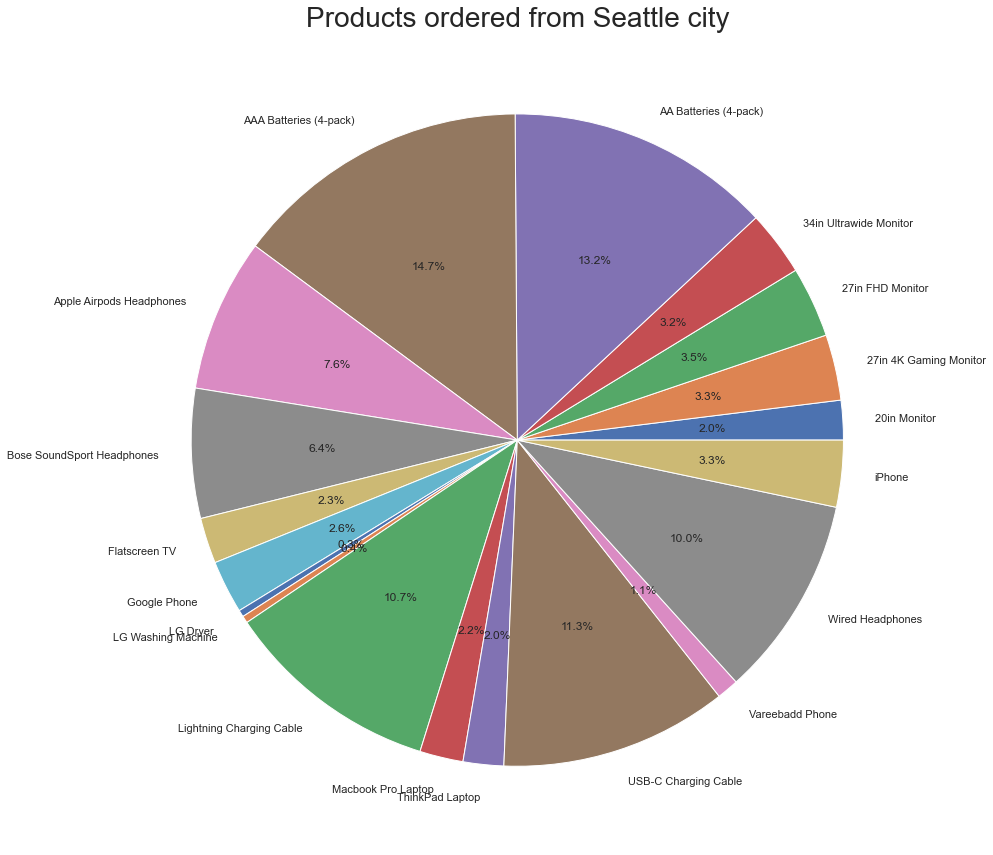

In [55]:
#To find the number products 
seattle_product = seattle.groupby(('Product')).agg({'Quantity Ordered': 'sum'})

#Grouped data will be in array format, have to change in to coulmns
seattle_product = seattle_product.reset_index()
#print(seattle_product)

quantity= seattle_product['Quantity Ordered']
products= seattle_product.Product
#plotting pie chart to find highest products ordered in the city

plt.figure(figsize = (30,15)) 

plt.pie(quantity,labels = products, autopct='%1.1f%%')
plt.title('Products ordered from Seattle city', fontsize=28)
plt.show()

We could see AAA Batteries (4-pack) has highest ordered in the Seattle city

In [56]:
#New York City Data
value_list = ["New York City"]
boolean_series = final_df['City'].isin(value_list)
nyc = final_df[boolean_series]
#nyc

# 4a. Portland monthly sales 

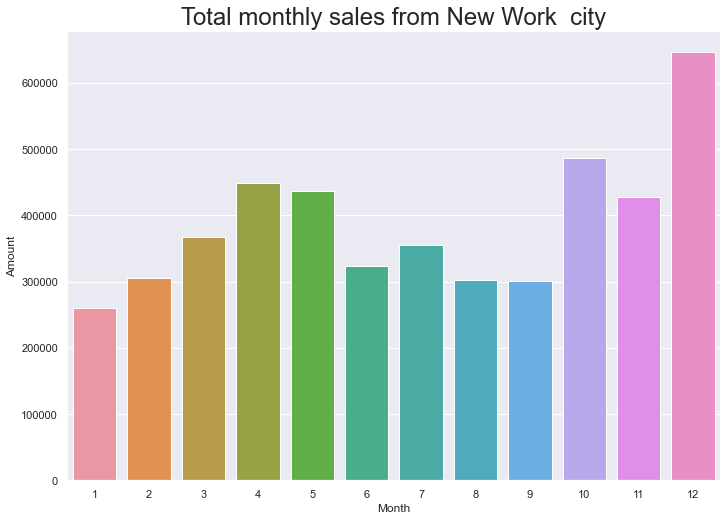

In [57]:
#Obtaining total sales by different months, by groupby function
nyc_monthly = nyc.groupby(('Month')).agg({'Amount': 'sum'})


#Grouped data will be in array format, have to change in to coulmns
nyc_monthly = nyc_monthly.reset_index()
#print(nyc_monthly)

#ploting bar graph through seaborn

x= nyc_monthly.Amount
y= nyc_monthly.Month

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(y,x).set_title('Total monthly sales from New Work  city', fontsize = 24)

As we could see 12th month has highest sale than other month. i.e December month

# 4d. Highest product ordered in New York city

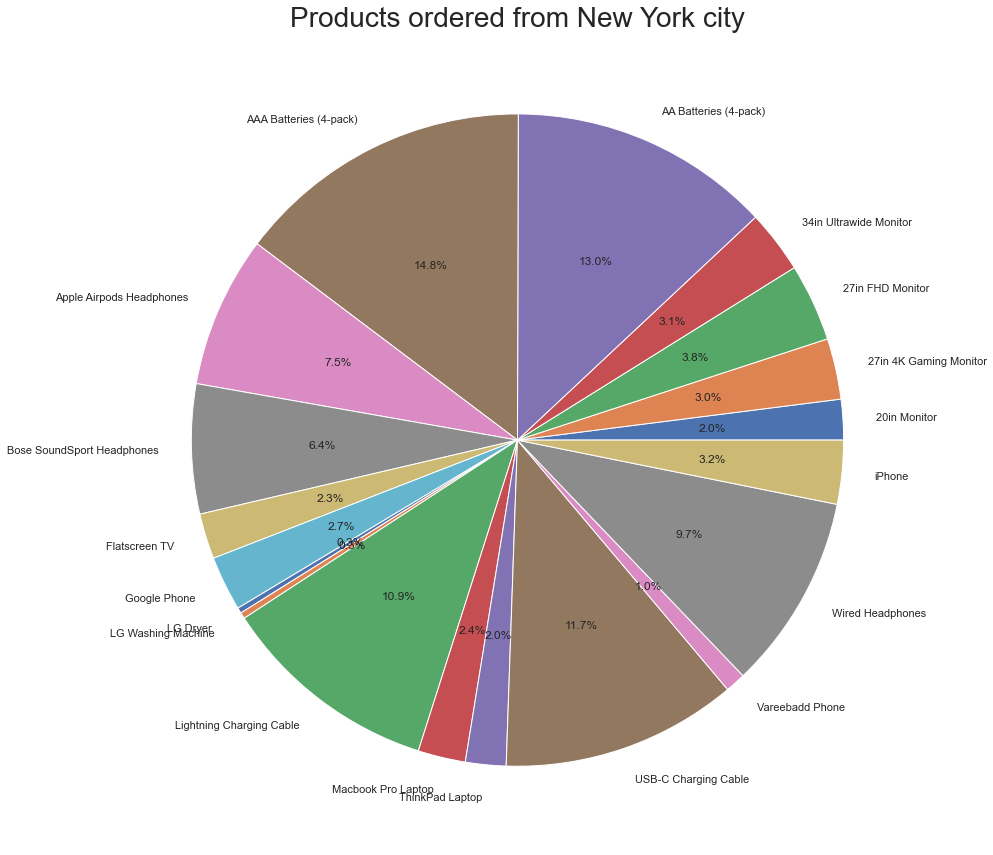

In [58]:
#To find the number products 
nyc_product = nyc.groupby(('Product')).agg({'Quantity Ordered': 'sum'})

#Grouped data will be in array format, have to change in to coulmns
nyc_product = nyc_product.reset_index()
#print(nyc_product)

quantity= nyc_product['Quantity Ordered']
products= nyc_product.Product
#plotting pie chart to find highest products ordered in the city

plt.figure(figsize = (30,15)) 

plt.pie(quantity,labels = products, autopct='%1.1f%%')
plt.title('Products ordered from New York city', fontsize=28)
plt.show()

We could see AAA Batteries (4-pack) has highest ordered in the New York city

In [59]:
#Dallas Data
value_list = ["Dallas"]
boolean_series = final_df['City'].isin(value_list)
dallas = final_df[boolean_series]
#dallas

# 4a. Dallas monthly sales 

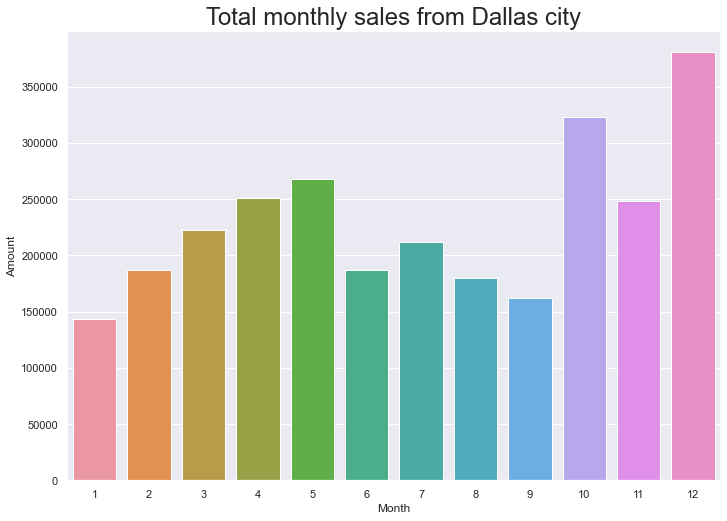

In [60]:
#Obtaining total sales by different months, by groupby function
dallas_monthly = dallas.groupby(('Month')).agg({'Amount': 'sum'})


#Grouped data will be in array format, have to change in to coulmns
dallas_monthly = dallas_monthly.reset_index()
#print(dallas_monthly)

#ploting bar graph through seaborn

x= dallas_monthly.Amount
y= dallas_monthly.Month

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(y,x).set_title('Total monthly sales from Dallas city', fontsize = 24)

As we could see 12th month has highest sale than other month. i.e December month

# 4d. Highest product ordered in Dallas city

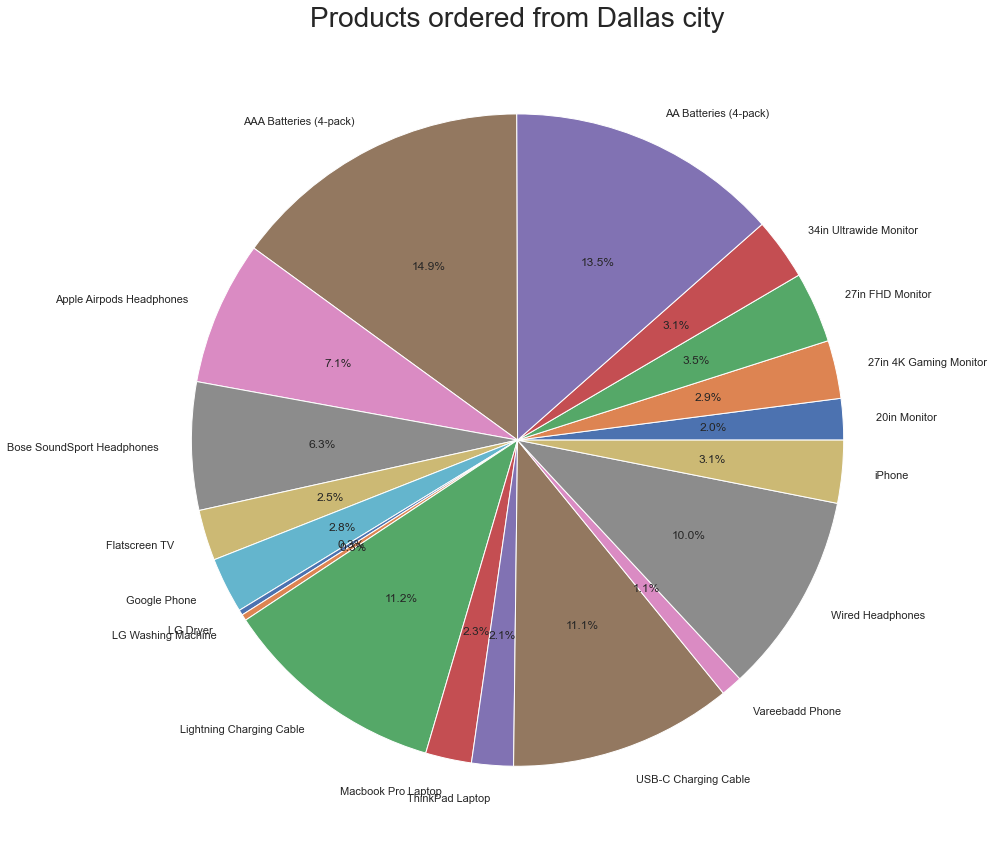

In [61]:
#To find the number products 
dallas_product = dallas.groupby(('Product')).agg({'Quantity Ordered': 'sum'})

#Grouped data will be in array format, have to change in to coulmns
dallas_product = dallas_product.reset_index()
#print(dallas_product)

quantity= dallas_product['Quantity Ordered']
products= dallas_product.Product
#plotting pie chart to find highest products ordered in the city

plt.figure(figsize = (30,15)) 

plt.pie(quantity,labels = products, autopct='%1.1f%%')
plt.title('Products ordered from Dallas city', fontsize=28)
plt.show()

We could see AAA Batteries (4-pack) has highest ordered in the Portland city

# 5. Find out the distribution of sales over different times of the day (Morning, Afternoon, Evening, Night) and answer the following for each city;


a. What products are mostly sold at different times of the day?


b. Which time of day has the most sales?

In [62]:
final_df.Hour.unique()

array([21, 14, 13, 20, 11, 12, 10, 18, 19, 17,  8,  9,  0, 22, 23, 16,  7,
       15,  1,  2,  5,  6,  3,  4], dtype=int64)

As the orders are placed at all the hours of the day, it is better to devide a day into (late night, early morning, morning, afternoon, evening, night and late night)


In [63]:
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Afternoon','Evening','Night']
final_df['Time'] = pd.cut(final_df['Hour'], bins=b, labels=l, include_lowest=True)
def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Afternoon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4): 
        return'Late Night'
#parsing to dataframe as a new column namely Time
final_df['Time'] = final_df['Hour'].apply(f)
final_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Street,City,Postal Code,Amount,Hour,Month,Time
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,944 Walnut St,Boston,MA 02215,700.00,21,1,Night
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,185 Maple St,Portland,OR 97035,14.95,14,1,Afternoon
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,538 Adams St,San Francisco,CA 94016,23.98,13,1,Afternoon
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,738 10th St,Los Angeles,CA 90001,149.99,20,1,Evening
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,387 10th St,Austin,TX 73301,11.99,11,1,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
185945,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,14 Madison St,San Francisco,CA 94016,14.95,20,12,Evening
185946,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,549 Willow St,Los Angeles,CA 90001,7.68,12,12,Morning
185947,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,273 Wilson St,Seattle,WA 98101,400.00,6,12,Early Morning
185948,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,778 River St,Dallas,TX 75001,11.99,10,12,Morning


# Distribution of sales over different time of the day

In [64]:
#Determing counts of products in the different hours of the day
time_wise = final_df.groupby(('Time')).agg({'Product': 'count'})
time_wise = time_wise.reset_index()
time_wise

,Time,Product
0,Afternoon,43587
1,Early Morning,14050
2,Evening,48242
3,Late Night,9172
4,Morning,44620
5,Night,25968


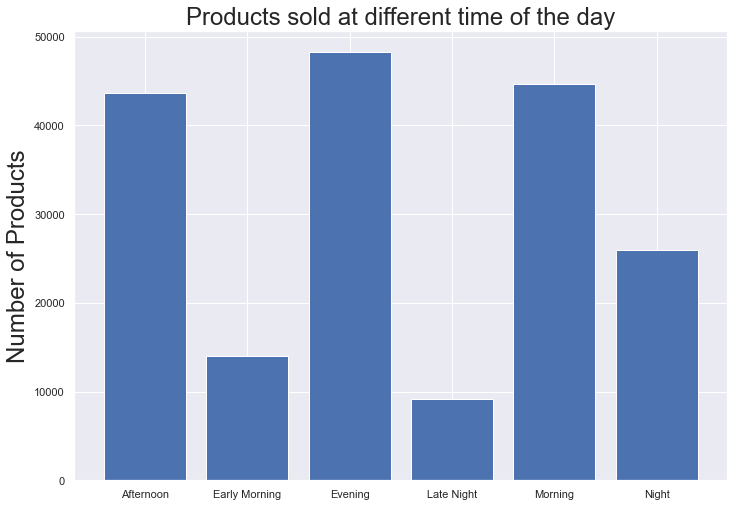

In [65]:
#plotting the bat graph which shows which time of the day does the retail store has maximum number of orders

x= time_wise.Time
y= time_wise.Product

plt.bar(x,y)
plt.title("Products sold at different time of the day", fontsize = 24)
plt.ylabel('Number of Products', fontsize = 24)
plt.show()

# 5b. Which time of day has the most sales?

Sales is greater at Evening time


# 5a.What products are mostly sold at different times of the day? 

# Early Morning data 

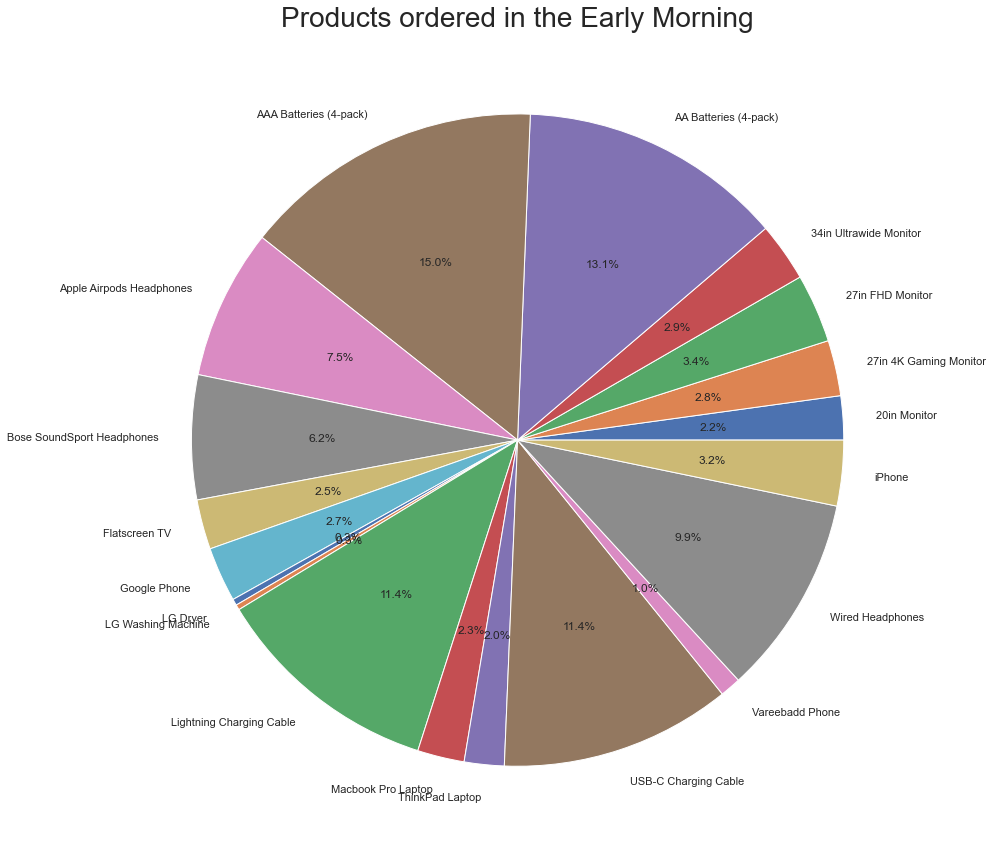

In [66]:
value_list = ["Early Morning"]
boolean_series = final_df['Time'].isin(value_list)
early = final_df[boolean_series]
#early

prod = early.groupby(('Product')).agg({'Quantity Ordered': 'sum'})
prod= prod.reset_index()
#prod

x= prod.Product
y= prod['Quantity Ordered']

plt.figure(figsize = (30,15)) 

plt.pie(y,labels = x, autopct='%1.1f%%')
plt.title('Products ordered in the Early Morning', fontsize=28)
plt.show()

# Morning Data

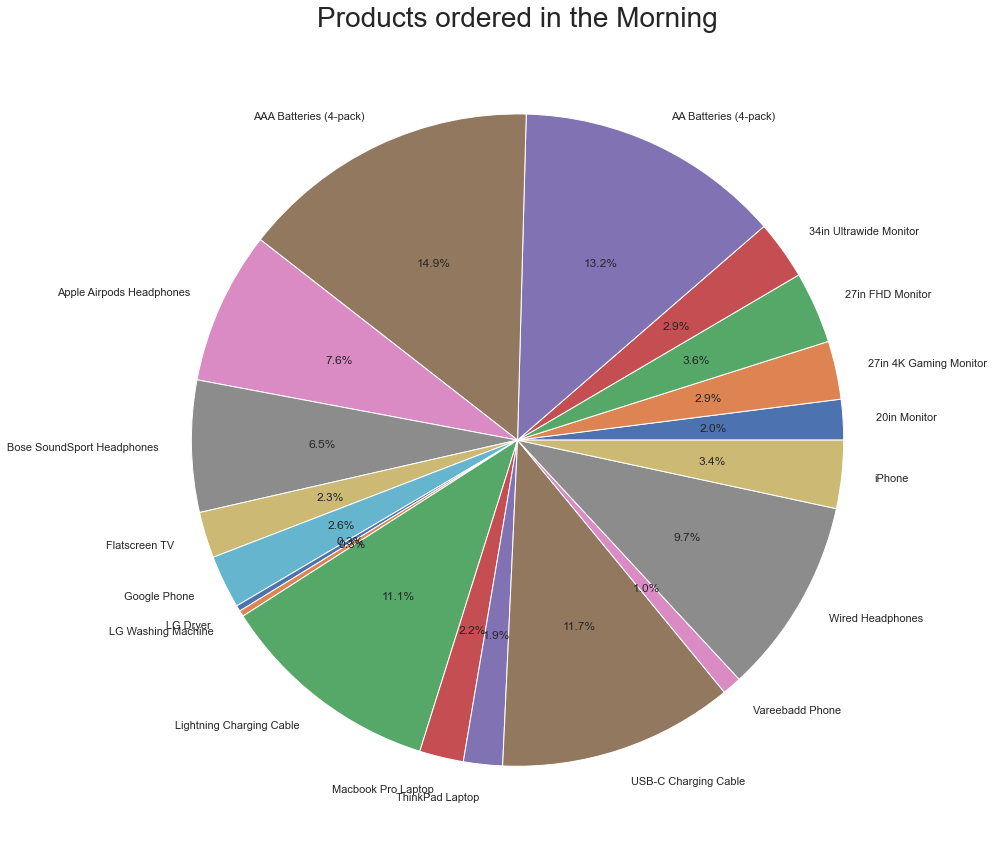

In [67]:
value_list = ["Morning"]
boolean_series = final_df['Time'].isin(value_list)
morning = final_df[boolean_series]
#morning

prod = morning.groupby(('Product')).agg({'Quantity Ordered': 'sum'})
prod= prod.reset_index()
#prod

x= prod.Product
y= prod['Quantity Ordered']

plt.figure(figsize = (30,15)) 

plt.pie(y,labels = x, autopct='%1.1f%%')
plt.title('Products ordered in the Morning', fontsize=28)
plt.show()

# Afternoon data

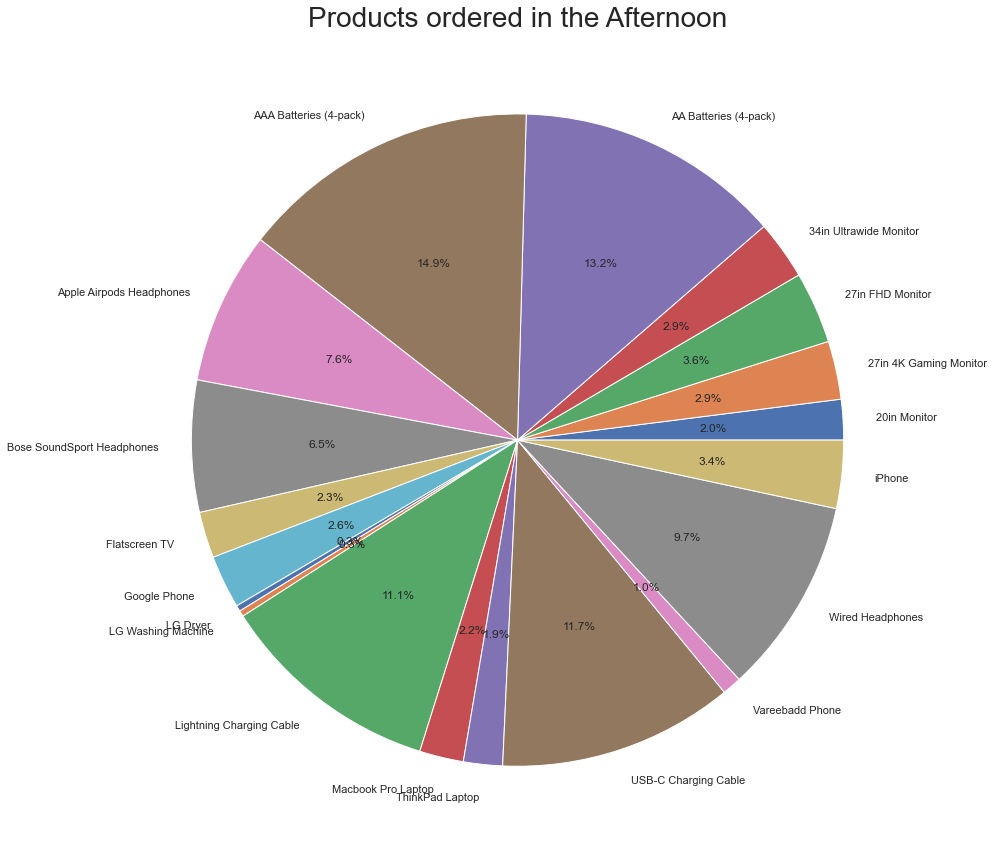

In [68]:
# value_list = ["Afternoon"]
boolean_series = final_df['Time'].isin(value_list)
afternoon = final_df[boolean_series]
#afternoon

prod = afternoon.groupby(('Product')).agg({'Quantity Ordered': 'sum'})
prod= prod.reset_index()
#prod

x= prod.Product
y= prod['Quantity Ordered']

plt.figure(figsize = (30,15)) 

plt.pie(y,labels = x, autopct='%1.1f%%')
plt.title('Products ordered in the Afternoon', fontsize=28)
plt.show()

# Evening data

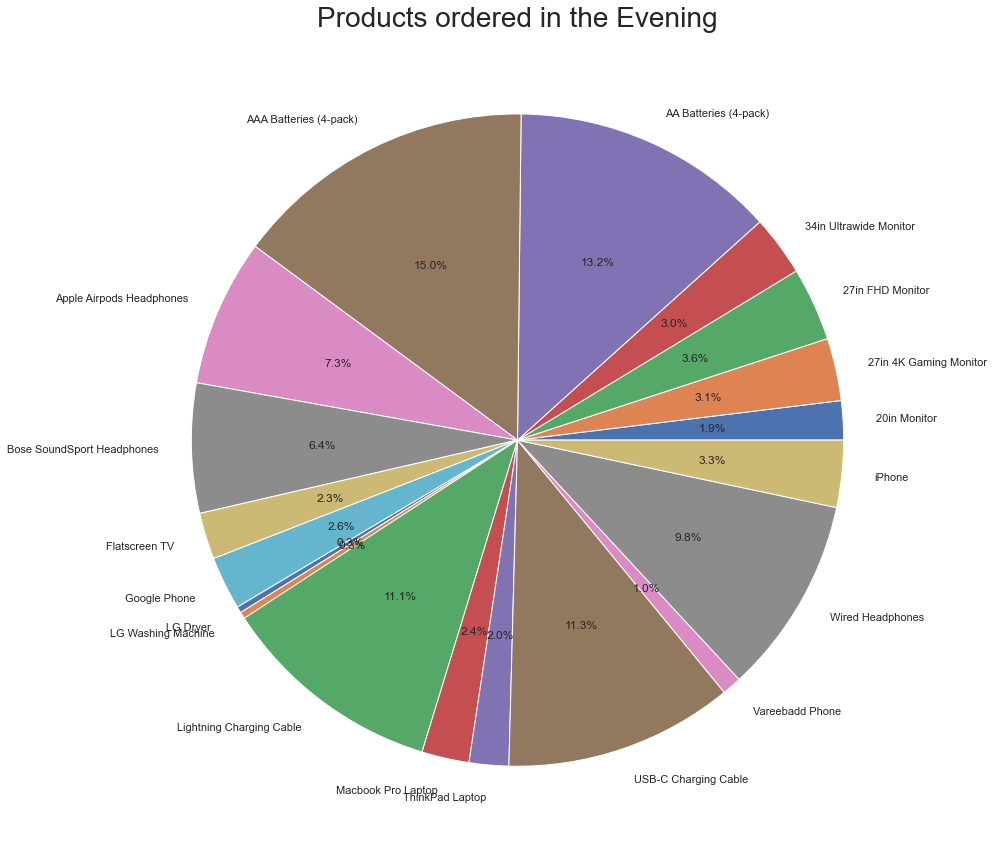

In [69]:
value_list = ["Evening"]
boolean_series = final_df['Time'].isin(value_list)
evening = final_df[boolean_series]
#evening

prod = evening.groupby(('Product')).agg({'Quantity Ordered': 'sum'})
prod= prod.reset_index()
#prod

x= prod.Product
y= prod['Quantity Ordered']

plt.figure(figsize = (30,15)) 

plt.pie(y,labels = x, autopct='%1.1f%%')
plt.title('Products ordered in the Evening', fontsize=28)
plt.show()

# Night data

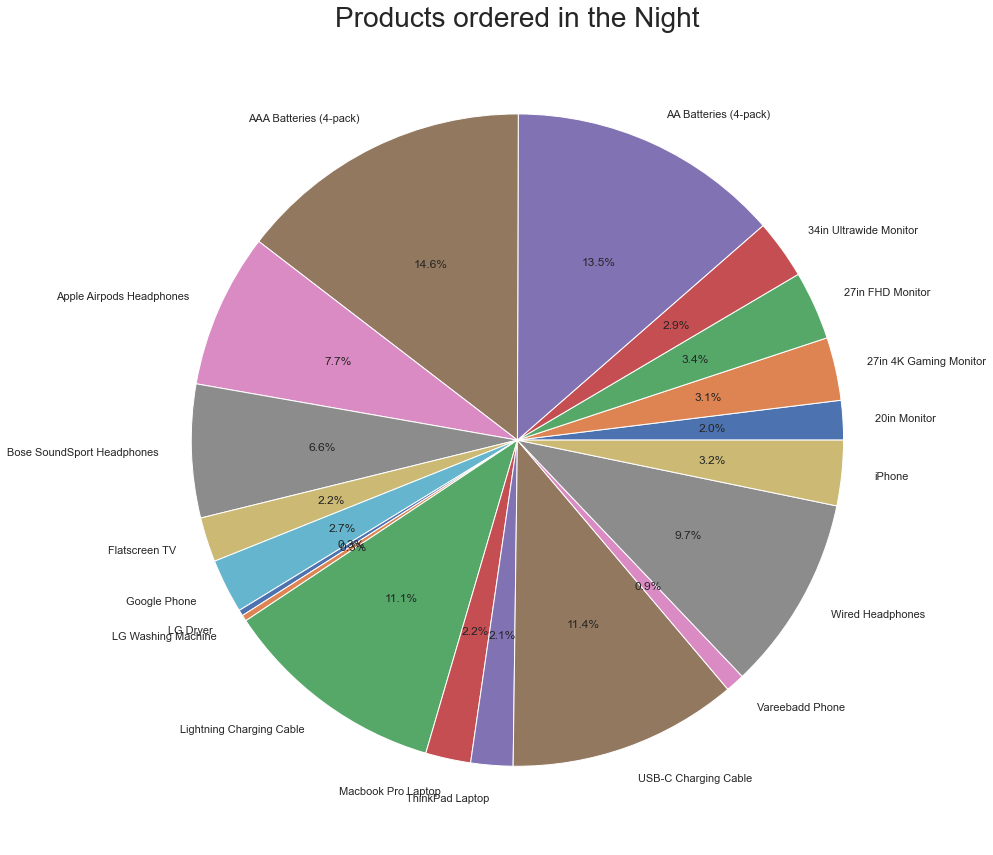

In [70]:
value_list = ["Night"]
boolean_series = final_df['Time'].isin(value_list)
night = final_df[boolean_series]
#night

prod = night.groupby(('Product')).agg({'Quantity Ordered': 'sum'})
prod= prod.reset_index()
#prod

x= prod.Product
y= prod['Quantity Ordered']

plt.figure(figsize = (30,15)) 

plt.pie(y,labels = x, autopct='%1.1f%%')
plt.title('Products ordered in the Night', fontsize=28)
plt.show()

# Late Night data

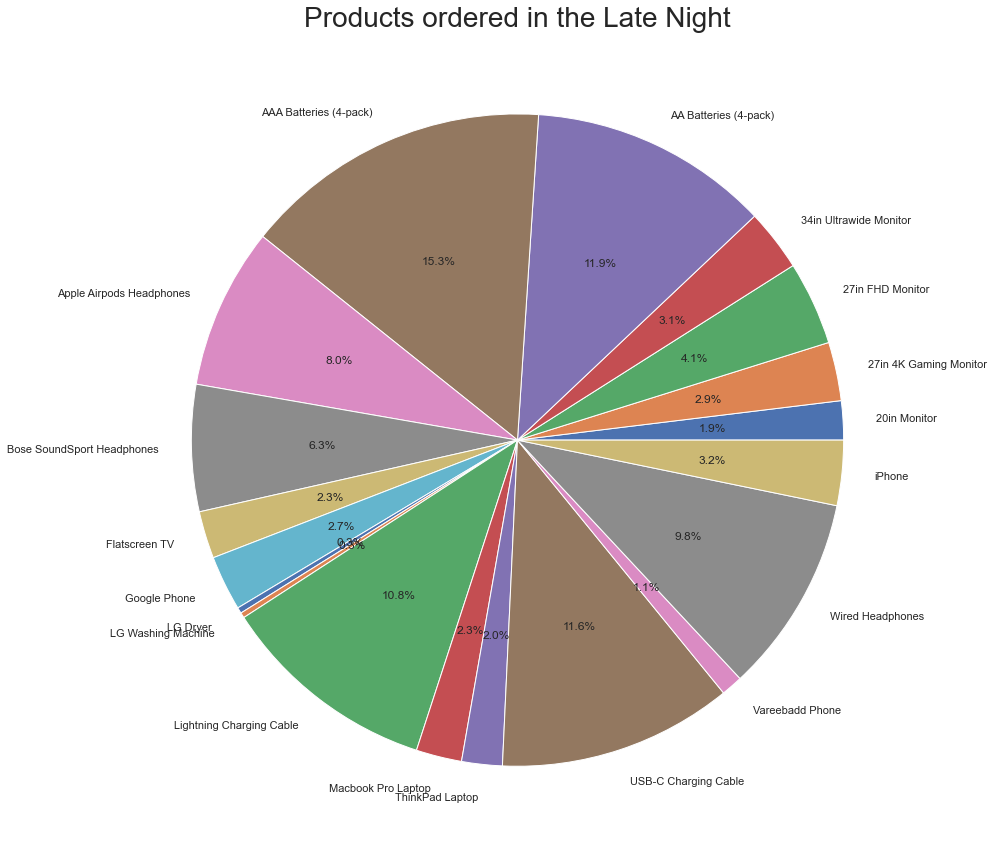

In [71]:
value_list = ["Late Night"]
boolean_series = final_df['Time'].isin(value_list)
latenight = final_df[boolean_series]
#latenight

prod = latenight.groupby(('Product')).agg({'Quantity Ordered': 'sum'})
prod= prod.reset_index()
#prod

x= prod.Product
y= prod['Quantity Ordered']

plt.figure(figsize = (30,15)) 

plt.pie(y,labels = x, autopct='%1.1f%%')
plt.title('Products ordered in the Late Night', fontsize=28)
plt.show()

# 6. Find out the pair of products that are most sold together. 
For example, generally, we would expect a person who buys an iPhone 11 to also buy the Apple Airpods together with it. Identify such pairs of products and suggest what promotional offers should the retail company come up with based on your outcome.
 

In [72]:
#To analyse
final_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Street,City,Postal Code,Amount,Hour,Month,Time
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,944 Walnut St,Boston,MA 02215,700.00,21,1,Night
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,185 Maple St,Portland,OR 97035,14.95,14,1,Afternoon
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,538 Adams St,San Francisco,CA 94016,23.98,13,1,Afternoon
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,738 10th St,Los Angeles,CA 90001,149.99,20,1,Evening
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,387 10th St,Austin,TX 73301,11.99,11,1,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
185945,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,14 Madison St,San Francisco,CA 94016,14.95,20,12,Evening
185946,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,549 Willow St,Los Angeles,CA 90001,7.68,12,12,Morning
185947,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,273 Wilson St,Seattle,WA 98101,400.00,6,12,Early Morning
185948,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,778 River St,Dallas,TX 75001,11.99,10,12,Morning


In [73]:
#We will filter through Group ID, as when bough together, Order ID will be same for both orders

In [74]:
pair = final_df.groupby('Order ID').agg({'Quantity Ordered': 'count'})
pair = pair.reset_index()
pair.sort_values(by = 'Quantity Ordered', ascending=False)

,Order ID,Quantity Ordered
19639,160873,5
52277,193511,4
136641,277875,4
24431,165665,4
147883,289117,4
...,...,...
60691,201925,1
60692,201926,1
60693,201927,1
60694,201928,1


- Above are the categorical Order ID 

In [75]:
#Now we will eliminate Order IDs having one product

In [76]:
pair = pair[pair['Quantity Ordered'] != 1]
pair.sort_values(by='Quantity Ordered')

,Order ID,Quantity Ordered
41,141275,2
116304,257538,2
116297,257531,2
116286,257520,2
116284,257518,2
...,...,...
171228,312462,4
155119,296353,4
71100,212334,4
55381,196615,4


- Above Order IDs of the orders placed with more than one products

In [77]:
#We have to filter above orders, with the help of Order ID we have got
df_common = final_df.loc[final_df['Order ID'].isin(pair['Order ID'])]

#this is the data of all orders of products sold together
df_common

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Street,City,Postal Code,Amount,Hour,Month,Time
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,610 Walnut St,Austin,TX 73301,11.95,16,1,Afternoon
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,610 Walnut St,Austin,TX 73301,11.99,16,1,Afternoon
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,4 1st St,Los Angeles,CA 90001,150.00,8,1,Early Morning
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,4 1st St,Los Angeles,CA 90001,11.52,8,1,Early Morning
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,20 Dogwood St,New York City,NY 10001,400.00,11,1,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
185861,319584,Wired Headphones,1,11.99,2019-12-11 00:30:00,537 Sunset St,Portland,OR 97035,11.99,0,12,Late Night
185873,319596,iPhone,1,700.00,2019-12-01 08:44:00,436 14th St,New York City,NY 10001,700.00,8,12,Early Morning
185874,319596,Lightning Charging Cable,1,14.95,2019-12-01 08:44:00,436 14th St,New York City,NY 10001,14.95,8,12,Early Morning
185909,319631,34in Ultrawide Monitor,1,379.99,2019-12-17 22:35:00,363 Highland St,Austin,TX 73301,379.99,22,12,Night


In [78]:
#Now we can use sum function to see which products are having same Order ID
paired_product = df_common.groupby(('Order ID')).agg({'Product': 'sum'})
paired_product = paired_product.reset_index()

#This dataframe shows us the Order ID and their products 
paired_product

,Order ID,Product
0,141275,USB-C Charging CableWired Headphones
1,141290,Apple Airpods HeadphonesAA Batteries (4-pack)
2,141365,Vareebadd PhoneWired Headphones
3,141384,Google PhoneUSB-C Charging Cable
4,141450,Google PhoneBose SoundSport Headphones
...,...,...
6827,319536,Macbook Pro LaptopWired Headphones
6828,319556,Google PhoneWired Headphones
6829,319584,iPhoneWired Headphones
6830,319596,iPhoneLightning Charging Cable


In [79]:
#Using above data we will group and take a count of number of times same pair of products had sold
fin_pair = paired_product.groupby(('Product')).agg({'Order ID': 'count'})
fin_pair= fin_pair.reset_index()

#We will arrange in descing order, to know the maximum 
fin_pair = fin_pair.sort_values(by='Order ID',ascending=False)

#As we more number, we will take top 10 pairs
fin_pair = fin_pair.head(10)
fin_pair

,Product,Order ID
324,iPhoneLightning Charging Cable,886
163,Google PhoneUSB-C Charging Cable,857
343,iPhoneWired Headphones,361
282,Vareebadd PhoneUSB-C Charging Cable,312
178,Google PhoneWired Headphones,303
316,iPhoneApple Airpods Headphones,286
154,Google PhoneBose SoundSport Headphones,161
288,Vareebadd PhoneWired Headphones,104
173,Google PhoneUSB-C Charging CableWired Headphones,79
275,Vareebadd PhoneBose SoundSport Headphones,60


- Above is the dataframe of products sold together 

In [80]:
#Plotting a pie chart to show which pair of products are most sold together

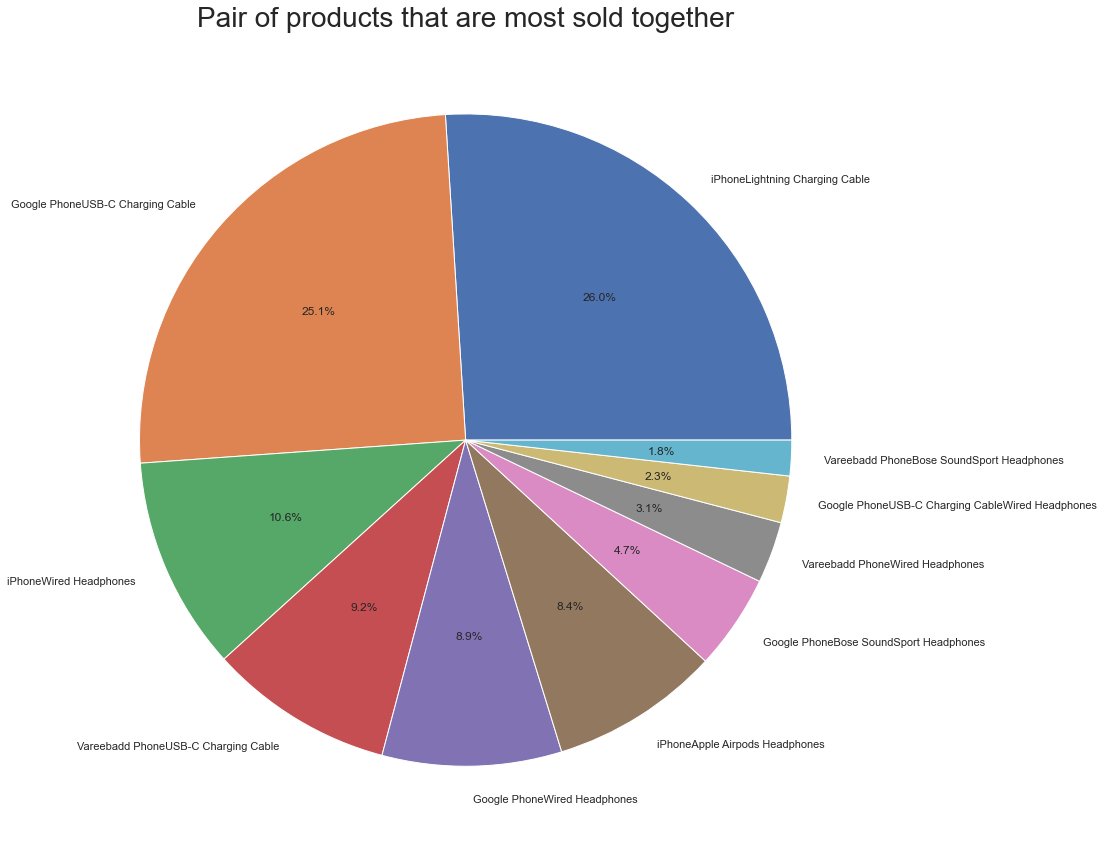

In [81]:
labels=fin_pair['Product']
x =fin_pair['Order ID']

plt.figure(figsize = (30,15)) 
plt.pie(x, labels = labels, autopct='%1.1f%%')
plt.title('Pair of products that are most sold together', fontsize=28)
plt.show()

- We could come to conclude that iPhone is ordered with Lightning Charging Cable most of the time
- Google Phone is ordered with USB-C Charging Cable


# From this analysis we could say that, providig free or discount on charging cable as promotional offer for both iPhone and Google Phone when bought together would make a great offer.
